# Visualization

Probability density function is `f(x, y) = c * x * y` where 'c' is a constant, 'x' and 'y' are random variables from set Omega, where `Omega = { (x, y) | 1 < x < y < 2 }`.


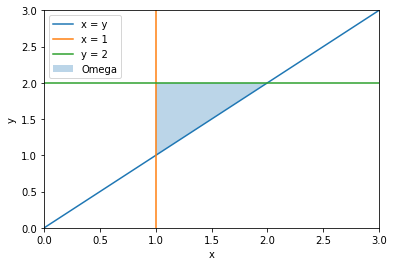

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# We get three equations:
# 1)    x > 1
# 2)    x < y
# 3)    y < 2

# From this we can derive that x will go from 1 to y and y will go from x to 2
# Therefore x will go from 1 to 2 and y will go from 1 to 2 as well
# To plot this we simply use the three functions with = instead of < or > and intersect them

x_range = np.linspace(1, 2, 1000)  # range of random variable X
sampling_range = np.linspace(0, 3, 1000)  # range of lines for visualization
f1 = sampling_range
# f2 will simply be plotted as a line because it is not a y = f(x) function
f3 = 2 * np.ones_like(sampling_range)

plt.plot(sampling_range, f1, label='x = y')
plt.plot((1, 1), (0, 3), label='x = 1')
plt.plot(sampling_range, f3, label='y = 2')

plt.fill_between(x_range, x_range, 2 * np.ones_like(x_range), alpha=0.3, label=r'Omega')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(left=0, right=3)
plt.ylim(bottom=0, top=3)

plt.savefig('omega_vis.png', dpi=600)
plt.show()

# Generator implementation


## General idea

For generating numbers from Omega we will use the rejection method.

In [2]:
import numpy as np

_const_c = 8/9
def f(x):
    """
    Density probability function
    Note that here "x" is a 2 element vector (i.e. variables X and Y)
    """
    return _const_c * x[0] * x[1]


Calculate max value of the probability function

In [3]:
fx_max = f((2, 2))

fx_max

3.5555555555555554

In [4]:
# Use this to generate random numbers with consistent seed
seed = 66
np_rng = np.random.default_rng(seed=seed)


Proof of concept of generating samples

In [5]:

# We will generate 100 samples
n_samples = 100

# Our x1 and x2 ranges are the same - from 1 to 2
xi_range = 1, 2

x1 = np_rng.uniform(*xi_range, size=n_samples)
x2 = np_rng.uniform(*xi_range, size=n_samples)
fx = np_rng.uniform(0, fx_max, size=n_samples)

# For simplicity create a matrix - each row is a sample of (x1, x2, fx)
samples = np.stack((x1, x2, fx), axis=1)

samples[:10]

array([[1.92373388, 1.51040136, 2.61800176],
       [1.69281813, 1.98988977, 2.58481953],
       [1.07293478, 1.16414471, 2.58183818],
       [1.62425381, 1.12028687, 1.46488514],
       [1.4725191 , 1.03945343, 2.27199935],
       [1.84901876, 1.26977353, 3.44762782],
       [1.10282827, 1.17467894, 3.43794991],
       [1.43752488, 1.68611076, 1.41176016],
       [1.46004468, 1.22352332, 0.28152982],
       [1.90878931, 1.27451867, 0.71716336]])

In [6]:
samples.shape

(100, 3)

To filter accepted values we can use following condition which will return a boolean array. Since we already generate from correct ranges we only need to ensure that x < y

In [7]:

accepted_filter = (np.apply_along_axis(f,1,samples) < samples[:, 2]) & (samples[:, 0] < samples[:, 1])
accepted = samples[accepted_filter]
accepted[:10]

array([[1.07293478, 1.16414471, 2.58183818],
       [1.10282827, 1.17467894, 3.43794991],
       [1.13803906, 1.46912417, 3.26260474],
       [1.22959056, 1.76988753, 2.3478668 ],
       [1.14288465, 1.45965636, 2.88048124],
       [1.25370907, 1.94948465, 2.30614333],
       [1.46925391, 1.90646712, 3.13749715],
       [1.09264071, 1.22133779, 3.03442874],
       [1.196885  , 1.34512349, 3.51723878],
       [1.0115308 , 1.86595125, 2.6435471 ]])

In [8]:
accepted_filter[:10]

array([False, False,  True, False, False, False,  True, False, False,
       False])

Analogically, rejected items can be obtaining by negating the condition

In [9]:
rejected_filter = ~((np.apply_along_axis(f,1,samples) < samples[:, 2]) & (samples[:, 0] < samples[:, 1]))
rejected = samples[rejected_filter]
rejected[:10]

array([[1.92373388, 1.51040136, 2.61800176],
       [1.69281813, 1.98988977, 2.58481953],
       [1.62425381, 1.12028687, 1.46488514],
       [1.4725191 , 1.03945343, 2.27199935],
       [1.84901876, 1.26977353, 3.44762782],
       [1.43752488, 1.68611076, 1.41176016],
       [1.46004468, 1.22352332, 0.28152982],
       [1.90878931, 1.27451867, 0.71716336],
       [1.79177719, 1.18483522, 1.77765827],
       [1.5297229 , 1.59680124, 0.18458611]])

In [10]:
rejected_filter[:10]

array([ True,  True, False,  True,  True,  True, False,  True,  True,
        True])

Negating rejected filter must give us the accepted filter

In [11]:
np.all(accepted_filter == ~rejected_filter)

True

## Value generation

In [14]:
def generate_samples(count=10_000, rng=np_rng):
    """
    Generates batch of samples from the distribution

    Args:
        fx_max float: max_value of fx
        count int: number of samples to generate
        rng: rng generator. Defaults to np_rng.

    Returns:
        _type_: _description_
    """
    # x1 and x2 have the same range - from 1 to 2
    start, end = 1, 2
    fx_max = f((2, 2))  # calculate max value of fx
    
    # Generate vector (matrix) u which will contain x1 and x2
    u = np_rng.uniform(0, 1, 2*count)
    
    # Since x1 and x2 and have same range we can simply generate 2*count vector and then split it into two vectors
    u = u.reshape(-1, 2)
    
    # Adjust scaling
    x = start + (end - start) * u
    
    # Generate "v" vector which contains function values
    v = np_rng.uniform(0, 1, count)
    
    # Not calling function f and computing it in-place like so will save us irrelevant msecs
    fx = x[:, 0] * x[:, 1]
    
    # Finally filter out only accepted samples - i.e. f(x) < v * fx_max and x1 < x2
    return x[(v * fx_max < fx) & (x[:, 0] < x[:, 1])]
    

In [17]:
x = generate_samples(10_000_000)
x[:, 1].mean(), x[:, 1]

(1.7180597797769643,
 array([1.44048661, 1.66404877, 1.95123216, ..., 1.83459791, 1.39676583,
        1.76955099]))

In [37]:
x[:, 1]

array([1.57294727, 1.56260903, 1.67726104, ..., 1.82648253, 1.84099692,
       1.29802099])

## Expected value and variance convergence

i.e. we want to test how many samples will be good enough to get close to the expected value and variance of the original distribution.
Here we test several different sample sizes. We run each sample size 1000 times and calculate the mean and variance of the results which we compare to the exact value to see how close we can get.

In [25]:
n_runs = 1000
sample_sizes = [100, 1000, 10_000, 100_000, 1_000_000] # 10 elements could throw NaN and are small enough sample size anyway

In [26]:
def run_sample_size(sample_size: int, n_runs):
    """
    Runs sample size n times

    Args:
        sample_size (int): _description_
        n_runs (_type_, optional): _description_. Defaults to n_runs.

    Returns:
        mean, variance and percent accepted
    """
    x_mean = [None for _ in range(n_runs)]
    x_var = [None for _ in range(n_runs)]
    percent_accepted = [None for _ in range(n_runs)]
    
    for i in range(n_runs):
        x = generate_samples(count=sample_size)
        x_mean[i] = np.mean(x, axis=0)
        x_var[i] = np.var(x, axis=0, dtype=np.float64)
        percent_accepted[i] = 100 * x.shape[0] / sample_size
    
    return x_mean, x_var, percent_accepted

In [27]:

stats = {}
for sample_size in sample_sizes:
    mean, var, percent_accepted = run_sample_size(sample_size, n_runs=n_runs)
    stats[sample_size] = {
        'mean': mean,
        'var': var,
        'percent_accepted': percent_accepted
    }

In [28]:

# Calculate average stats for each sample size
avg_stats = {}
for sample_size in stats.keys():
    avg_stats[sample_size] = {
        'mean': np.mean(stats[sample_size]['mean'], axis=0),
        'var': np.mean(stats[sample_size]['var'], axis=0),
        'percent_accepted': np.mean(stats[sample_size]['percent_accepted'], axis=0)
    }

avg_stats

{100: {'mean': array([1.39420957, 1.7199525 ]),
  'var': array([0.0587273 , 0.04470058]),
  'percent_accepted': 31.673},
 1000: {'mean': array([1.39163494, 1.7179828 ]),
  'var': array([0.06011598, 0.04657944]),
  'percent_accepted': 31.6014},
 10000: {'mean': array([1.39187233, 1.71795236]),
  'var': array([0.06031345, 0.04668034]),
  'percent_accepted': 31.59163},
 100000: {'mean': array([1.39171918, 1.7180818 ]),
  'var': array([0.06030521, 0.04665762]),
  'percent_accepted': 31.583063000000003},
 1000000: {'mean': array([1.39170971, 1.71811243]),
  'var': array([0.06033134, 0.04665913]),
  'percent_accepted': 31.587279800000005}}

We will use values calculated from Wolfram alpha / by hand as ground truth and compare the results against them

In [29]:
actual_mean_x = 1.39259
actual_mean_y = 1.71852
actual_var_x = .06067
actual_var_y = .04669

actual_mean = np.array([actual_mean_x, actual_mean_y])
actual_var = np.array([actual_var_x, actual_var_y])

In [31]:

for sample_size in avg_stats.keys():
    print(f'Sample size {sample_size}')
    mean_err = avg_stats[sample_size]["mean"] - actual_mean    
    print(f'  Mean: {avg_stats[sample_size]["mean"]}, difference with ground truth: {mean_err}')
    var_err = avg_stats[sample_size]["var"] - actual_var
    print(f'  Variance: {avg_stats[sample_size]["var"]}, difference with ground truth: {var_err}')

Sample size 100
  Mean: [1.39420957 1.7199525 ], difference with expected value: [0.00161957 0.0014325 ]
  Variance: [0.0587273  0.04470058], difference with expected value: [-0.0019427  -0.00198942]
Sample size 1000
  Mean: [1.39163494 1.7179828 ], difference with expected value: [-0.00095506 -0.0005372 ]
  Variance: [0.06011598 0.04657944], difference with expected value: [-0.00055402 -0.00011056]
Sample size 10000
  Mean: [1.39187233 1.71795236], difference with expected value: [-0.00071767 -0.00056764]
  Variance: [0.06031345 0.04668034], difference with expected value: [-3.56553444e-04 -9.66266997e-06]
Sample size 100000
  Mean: [1.39171918 1.7180818 ], difference with expected value: [-0.00087082 -0.0004382 ]
  Variance: [0.06030521 0.04665762], difference with expected value: [-3.64787721e-04 -3.23849344e-05]
Sample size 1000000
  Mean: [1.39170971 1.71811243], difference with expected value: [-0.00088029 -0.00040757]
  Variance: [0.06033134 0.04665913], difference with expected

I.e. for 1,000,000 samples we get around 3e-4 error in expected value and 3e-5 error in variance

## Rejection visualization